<a href="https://colab.research.google.com/github/Mahmoudkhaled17/KMEAN/blob/main/kmeams_satalitedata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# prompt: https://drive.google.com/file/d/18xB1UfTFrDJVbH_JprANcN26K2Vh1qOD/view?usp=drive_link read this dataset

!gdown --id 18xB1UfTFrDJVbH_JprANcN26K2Vh1qOD
df = pd.read_csv('jan_train.csv')

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=18xB1UfTFrDJVbH_JprANcN26K2Vh1qOD
From (redirected): https://drive.google.com/uc?id=18xB1UfTFrDJVbH_JprANcN26K2Vh1qOD&confirm=t&uuid=e4a05e9e-747e-4049-85b2-22990cf2479f
To: /content/jan_train.csv
100% 132M/132M [00:04<00:00, 30.3MB/s]


# DESCRIBE DATA

In [ ]:
df.head()

id                    epoch  sat_id             x             y  \
0   0  2014-01-01 00:00:00.000       0  -8855.823863  13117.780146   
1   1  2014-01-01 00:46:43.000       0 -10567.672384   1619.746066   
2   2  2014-01-01 01:33:26.001       0 -10578.684043 -10180.467460   
3   3  2014-01-01 02:20:09.001       0  -9148.251857 -20651.437460   
4   4  2014-01-01 03:06:52.002       0  -6719.092336 -28929.061629   

              z        Vx        Vy        Vz         x_sim         y_sim  \
0 -20728.353233 -0.908303 -3.808436 -2.022083  -8843.131454  13138.221690   
1 -24451.813271 -0.302590 -4.272617 -0.612796 -10555.500066   1649.289367   
2 -24238.280949  0.277435 -4.047522  0.723155 -10571.858472 -10145.939908   
3 -20720.381279  0.715600 -3.373762  1.722115  -9149.620794 -20618.200201   
4 -14938.907967  0.992507 -2.519732  2.344703  -6729.358857 -28902.271436   

          z_sim    Vx_sim    Vy_sim    Vz_sim  
0 -20741.615306 -0.907527 -3.804930 -2.024133  
1 -24473.089556 -0.303704 -4.269816 -0.616468  
2 -24271.169776  0.274880 -4.046788  0.718768  
3 -20765.019094  0.712437 -3.375202  1.718306  
4 -14992.399986  0.989382 -2.522618  2.342237

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503227 entries, 0 to 503226
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      503227 non-null  int64  
 1   epoch   503227 non-null  object 
 2   sat_id  503227 non-null  int64  
 3   x       503227 non-null  float64
 4   y       503227 non-null  float64
 5   z       503227 non-null  float64
 6   Vx      503227 non-null  float64
 7   Vy      503227 non-null  float64
 8   Vz      503227 non-null  float64
 9   x_sim   503227 non-null  float64
 10  y_sim   503227 non-null  float64
 11  z_sim   503227 non-null  float64
 12  Vx_sim  503227 non-null  float64
 13  Vy_sim  503227 non-null  float64
 14  Vz_sim  503227 non-null  float64
dtypes: float64(12), int64(2), object(1)
memory usage: 57.6+ MB


## epoch

In [ ]:
df['epoch']=pd.to_datetime(df['epoch'])

In [ ]:
print(df['epoch'].dt.year.unique())
print(df['epoch'].dt.month.unique())
print(df['epoch'].dt.day.unique())

[2014]
[1]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


**ALL DATA IN  2014**

**AND IN JAN**
**FROM 1 TO24**

**SO WE CAN COVERT IT TO 4-1-DAY-THEN TIME**

##sat_id

In [ ]:
df['sat_id'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
df[df['sat_id']==0].head()

id                   epoch  sat_id             x             y  \
0   0 2014-01-01 00:00:00.000       0  -8855.823863  13117.780146   
1   1 2014-01-01 00:46:43.000       0 -10567.672384   1619.746066   
2   2 2014-01-01 01:33:26.001       0 -10578.684043 -10180.467460   
3   3 2014-01-01 02:20:09.001       0  -9148.251857 -20651.437460   
4   4 2014-01-01 03:06:52.002       0  -6719.092336 -28929.061629   

              z        Vx        Vy        Vz         x_sim         y_sim  \
0 -20728.353233 -0.908303 -3.808436 -2.022083  -8843.131454  13138.221690   
1 -24451.813271 -0.302590 -4.272617 -0.612796 -10555.500066   1649.289367   
2 -24238.280949  0.277435 -4.047522  0.723155 -10571.858472 -10145.939908   
3 -20720.381279  0.715600 -3.373762  1.722115  -9149.620794 -20618.200201   
4 -14938.907967  0.992507 -2.519732  2.344703  -6729.358857 -28902.271436   

          z_sim    Vx_sim    Vy_sim    Vz_sim  
0 -20741.615306 -0.907527 -3.804930 -2.024133  
1 -24473.089556 -0.303704 -4.269816 -0.616468  
2 -24271.169776  0.274880 -4.046788  0.718768  
3 -20765.019094  0.712437 -3.375202  1.718306  
4 -14992.399986  0.989382 -2.522618  2.342237

In [ ]:
df[df['sat_id']==1].head()

id                   epoch  sat_id             x             y  \
741  1819 2014-01-01 00:00:00.000       1  10390.313089  -2796.458271   
742  1820 2014-01-01 00:21:11.845       1  11195.606833   5078.653968   
743  1821 2014-01-01 00:42:23.690       1   8235.556436  11445.904263   
744  1822 2014-01-01 01:03:35.534       1   3560.149776  15634.195146   
745  1823 2014-01-01 01:24:47.379       1  -1580.476891  18023.318335   

               z        Vx        Vy        Vz         x_sim         y_sim  \
741  3179.562085  2.520477  6.149930 -2.827599  10405.813755  -2771.180760   
742  -839.076593 -1.126667  5.826412 -3.255872  11199.853336   5102.405255   
743 -4680.514023 -3.230227  4.126433 -2.704441   8239.504004  11465.137350   
744 -7654.177182 -3.964696  2.520867 -1.978151   3569.107805  15652.050271   
745 -9755.287599 -4.050865  1.296388 -1.346512  -1566.253652  18042.143340   

           z_sim    Vx_sim    Vy_sim    Vz_sim  
741  3166.926302  2.508879  6.152996 -2.826227  
742  -845.930363 -1.130992  5.822303 -3.250049  
743 -4680.291877 -3.227356  4.123931 -2.700255  
744 -7650.341207 -3.960215  2.520907 -1.976723  
745 -9750.982621 -4.047005  1.297625 -1.347010

**SO ID REPRESENT TYPE FROM 0:599**

In [ ]:
df['sat_id'].value_counts()

sat_id
372    4894
186    4804
429    4702
321    4392
529    4386
       ... 
524      93
515      86
487      85
301      77
252      73
Name: count, Length: 600, dtype: int64

In [ ]:
df['sat_id'].value_counts().describe()

count     600.000000
mean      838.711667
std       846.268071
min        73.000000
25%       301.500000
50%       523.500000
75%      1055.500000
max      4894.000000
Name: count, dtype: float64

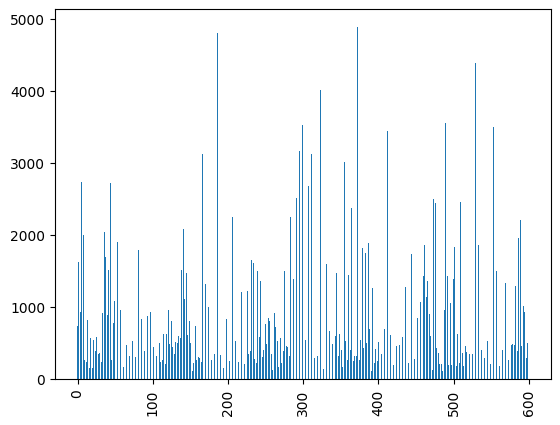

In [ ]:
plt.bar(df['sat_id'].value_counts().index,df['sat_id'].value_counts(),width=0.5)
plt.xticks(rotation=90)
plt.show()

##plot data distribution

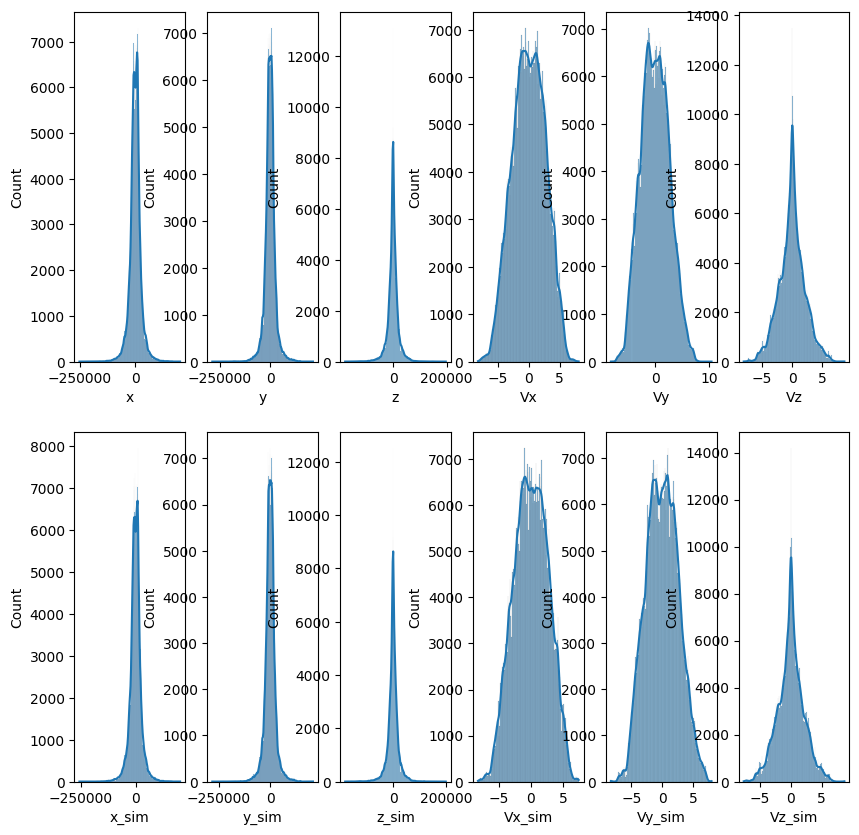

In [ ]:
fig,ax=plt.subplots(2,6,figsize=(10,10))
for i,col in enumerate(df.iloc[:,3:].columns):
  sns.histplot(df[col],ax=ax[i//6,i%6],kde=True)

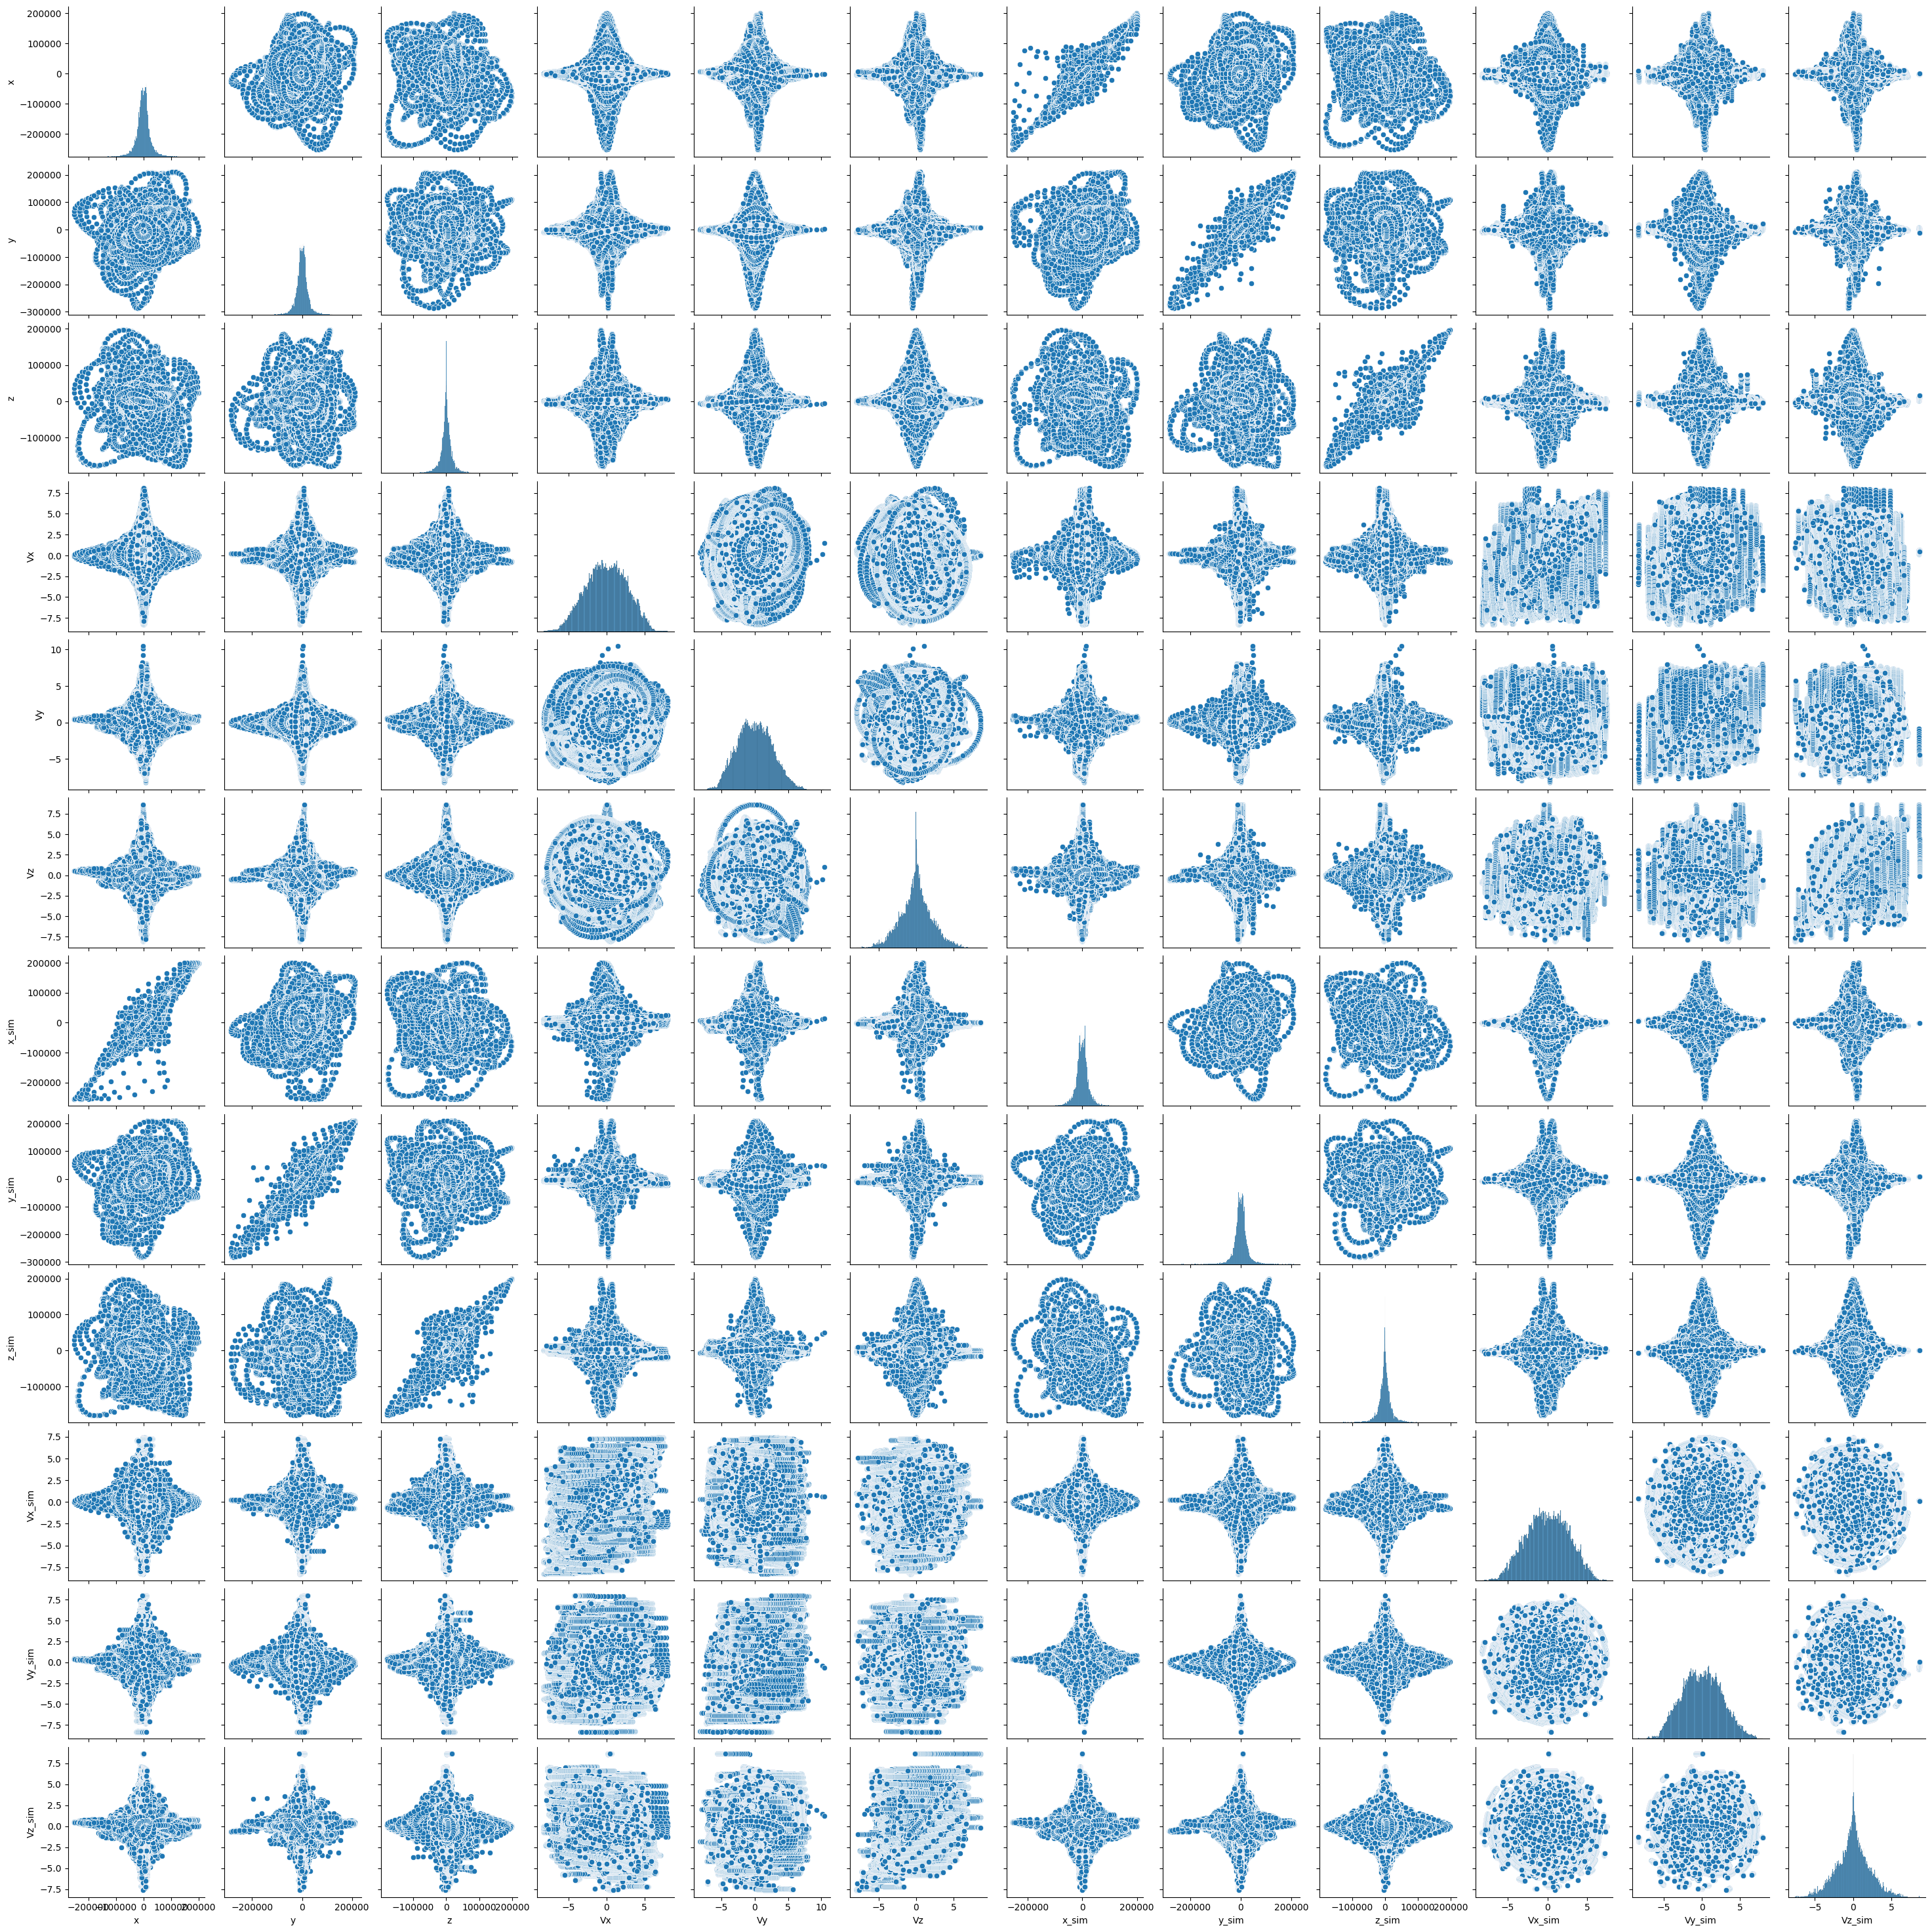

In [ ]:
sns.pairplot(df.iloc[:,3:])

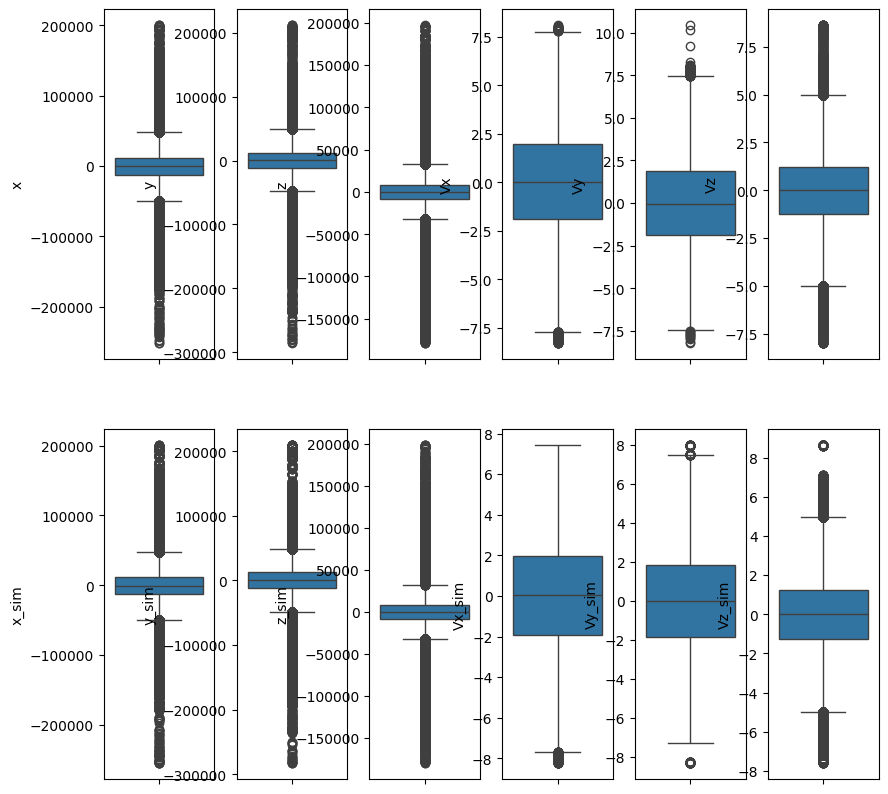

In [ ]:
fig,ax=plt.subplots(2,6,figsize=(10,10))
for i,col in enumerate(df.iloc[:,3:].columns):
  sns.boxplot(df[col],ax=ax[i//6,i%6])

#conculsion of description

**AFTER LOOK AT DATA WE KNOW WE NEED TO:**

* **remove id columns**
* **change type of epoch columns and convert it to integer repesent it epoc**
* **sat_id columns consist of 0:599 raw respresent type**
* **data have normal distrubtion so will use standar scalar**

* **out of layer**

# **EDA**

##change epoch

In [ ]:
df['epoch']=df['epoch'].astype(str)

In [ ]:
df['epoch']=df['epoch'].str.replace('-','')
df['epoch']=df['epoch'].str.replace('2014','4')
for i in range(10):
  df['epoch']=df['epoch'].str.replace(f"0{i}",f"{i}")
df['epoch']=df['epoch'].str.replace(':','')
df['epoch']=df['epoch'].str.replace('.','')
df['epoch']=df['epoch'].str.replace(' ','')
df['epoch']=df['epoch'].astype(int)

In [ ]:
df['epoch']

0              41100000
1            4110464300
2             411133261
3              41122091
4              41136522
              ...      
503222    4124221834370
503223      41242243257
503224     412423815645
503225     412423336283
503226    4124235756920
Name: epoch, Length: 503227, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503227 entries, 0 to 503226
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      503227 non-null  int64  
 1   epoch   503227 non-null  int64  
 2   sat_id  503227 non-null  int64  
 3   x       503227 non-null  float64
 4   y       503227 non-null  float64
 5   z       503227 non-null  float64
 6   Vx      503227 non-null  float64
 7   Vy      503227 non-null  float64
 8   Vz      503227 non-null  float64
 9   x_sim   503227 non-null  float64
 10  y_sim   503227 non-null  float64
 11  z_sim   503227 non-null  float64
 12  Vx_sim  503227 non-null  float64
 13  Vy_sim  503227 non-null  float64
 14  Vz_sim  503227 non-null  float64
dtypes: float64(12), int64(3)
memory usage: 57.6 MB


In [ ]:
df.describe()

id         epoch        sat_id              x              y  \
count  5.032270e+05  5.032270e+05  503227.00000  503227.000000  503227.000000   
mean   6.166217e+05  1.020599e+12     308.73285    -853.424865     402.306452   
std    3.566322e+05  1.582084e+12     171.48208   25370.592477   25618.708154   
min    0.000000e+00  4.113818e+06       0.00000 -251938.766780 -286031.403281   
25%    3.071875e+05  4.123236e+10     166.00000  -13149.249048  -11642.206414   
50%    6.161820e+05  4.114728e+11     312.00000    -545.685565     514.726887   
75%    9.260245e+05  4.162025e+11     461.00000   11261.755944   12617.338414   
max    1.233688e+06  4.124236e+12     599.00000  200382.689756  212443.393808   

                   z             Vx             Vy             Vz  \
count  503227.000000  503227.000000  503227.000000  503227.000000   
mean      -73.143385      -0.001196       0.000692      -0.000004   
std     20634.331833       2.641560       2.595759       2.115538   
min   -178922.412426      -8.286673      -8.231654      -8.004109   
25%     -8008.723282      -1.899626      -1.875851      -1.254823   
50%        32.264258       0.014117      -0.043151       0.010085   
75%      8255.508166       1.960258       1.853402       1.239201   
max    197200.530574       8.103981      10.444513       8.644108   

               x_sim          y_sim          z_sim         Vx_sim  \
count  503227.000000  503227.000000  503227.000000  503227.000000   
mean     -956.526943     327.145192     -83.960621      -0.001451   
std     25372.330435   25606.021391   20662.073081       2.640315   
min   -255037.952966 -282851.387908 -180250.922287      -8.243159   
25%    -13153.655148  -11704.492789   -7970.451958      -1.902258   
50%      -635.247190     535.867911      43.537419       0.020405   
75%     11174.979343   12558.738194    8219.956549       1.951909   
max    200779.519772  209619.553857  198526.091552       7.431851   

              Vy_sim         Vz_sim  
count  503227.000000  503227.000000  
mean        0.000761      -0.000410  
std         2.597858       2.113790  
min        -8.329723      -7.608696  
25%        -1.874874      -1.246798  
50%        -0.011274       0.012062  
75%         1.862468       1.235249  
max         7.989365       8.644165

## drop id

In [ ]:
df.drop('id',axis=1,inplace=True)

In [ ]:
df.head()

epoch  sat_id             x             y             z        Vx  \
0    41100000       0  -8855.823863  13117.780146 -20728.353233 -0.908303   
1  4110464300       0 -10567.672384   1619.746066 -24451.813271 -0.302590   
2   411133261       0 -10578.684043 -10180.467460 -24238.280949  0.277435   
3    41122091       0  -9148.251857 -20651.437460 -20720.381279  0.715600   
4    41136522       0  -6719.092336 -28929.061629 -14938.907967  0.992507   

         Vy        Vz         x_sim         y_sim         z_sim    Vx_sim  \
0 -3.808436 -2.022083  -8843.131454  13138.221690 -20741.615306 -0.907527   
1 -4.272617 -0.612796 -10555.500066   1649.289367 -24473.089556 -0.303704   
2 -4.047522  0.723155 -10571.858472 -10145.939908 -24271.169776  0.274880   
3 -3.373762  1.722115  -9149.620794 -20618.200201 -20765.019094  0.712437   
4 -2.519732  2.344703  -6729.358857 -28902.271436 -14992.399986  0.989382   

     Vy_sim    Vz_sim  
0 -3.804930 -2.024133  
1 -4.269816 -0.616468  
2 -4.046788  0.718768  
3 -3.375202  1.718306  
4 -2.522618  2.342237

## out of layers

In [ ]:
q1=df.iloc[:,2:-1].quantile(0.25)
q3=df.iloc[:,2:-1].quantile(0.75)
iqr=q3-q1
df_witout=df[~((df.iloc[:,2:-1]<(q1-1.5*iqr))|(df.iloc[:,2:-1]>(q3+1.5*iqr))).any(axis=1)]


In [ ]:
df_witout.shape

(401154, 14)

In [ ]:
df_witout.describe()

epoch         sat_id              x              y  \
count  4.011540e+05  401154.000000  401154.000000  401154.000000   
mean   1.015426e+12     310.725205    -698.393499     202.812779   
std    1.579265e+12     170.817850   17241.113331   16933.268901   
min    4.113818e+06       0.000000  -49757.553211  -48030.144601   
25%    4.123194e+10     166.000000  -11844.594516  -10538.765738   
50%    4.114536e+11     314.000000    -445.056048     569.195355   
75%    4.161933e+11     461.000000   10341.245784   11465.203988   
max    4.124236e+12     599.000000   47875.663597   49003.426677   

                   z             Vx             Vy             Vz  \
count  401154.000000  401154.000000  401154.000000  401154.000000   
mean     -125.711458      -0.005705      -0.008424      -0.015666   
std     11723.090389       2.849973       2.798338       2.063054   
min    -32401.557633      -7.688795      -7.465183      -4.995856   
25%     -7008.733840      -2.241872      -2.204075      -1.421918   
50%        11.678012      -0.000693      -0.055359       0.009274   
75%      7076.262258       2.273987       2.153066       1.373279   
max     32650.663555       7.725113       7.445160       4.980200   

               x_sim          y_sim          z_sim         Vx_sim  \
count  401154.000000  401154.000000  401154.000000  401154.000000   
mean     -774.304312     165.106866    -118.415031      -0.006374   
std     17246.262003   16951.945645   11679.685527       2.838200   
min    -49644.733605  -48097.141852  -32254.806819      -7.682545   
25%    -11952.562634  -10626.650177   -6870.143745      -2.235505   
50%      -561.457452     596.274971      16.846053       0.006370   
75%     10295.361931   11526.661778    6886.358111       2.251699   
max     47666.557255   48949.617213   32503.649078       7.431851   

              Vy_sim         Vz_sim  
count  401154.000000  401154.000000  
mean        0.014286      -0.020924  
std         2.793616       2.110595  
min        -7.277553      -7.176036  
25%        -2.177496      -1.432044  
50%         0.021348       0.012366  
75%         2.168119       1.381897  
max         7.466995       8.644165

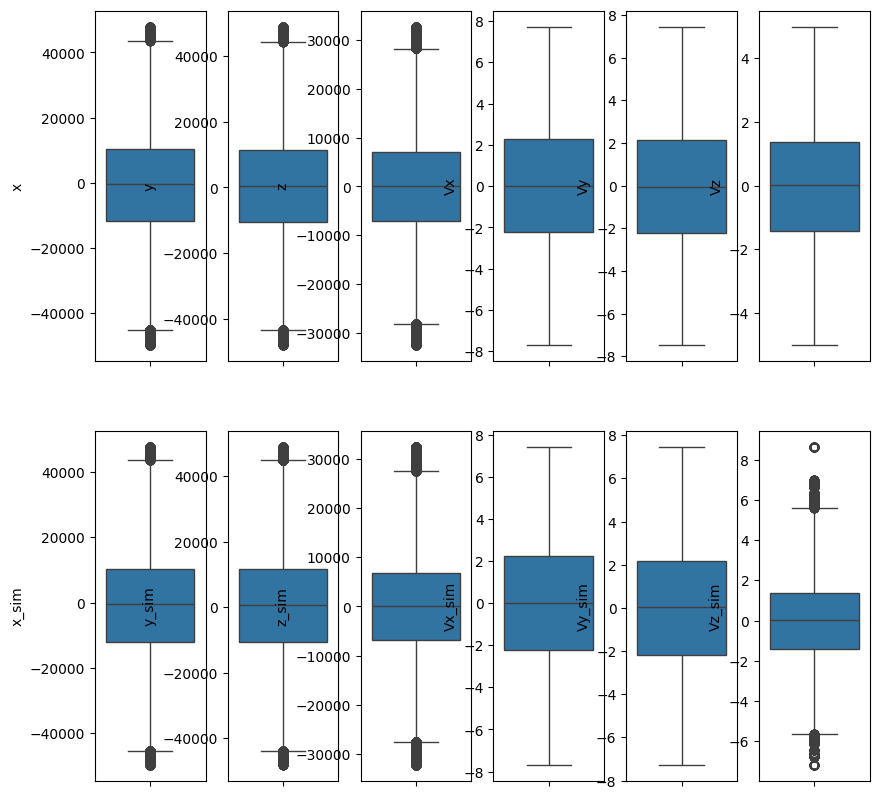

In [ ]:
fig,ax=plt.subplots(2,6,figsize=(10,10))
for i,col in enumerate(df_witout.iloc[:,2:].columns):
  sns.boxplot(df_witout[col],ax=ax[i//6,i%6])

## standarscalar

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
df_witout=scaler.fit_transform(df_witout)

In [ ]:
df_witout=pd.DataFrame(df_witout,columns=df.columns)

In [ ]:
df_witout.head()

epoch    sat_id         x         y         z        Vx        Vy  \
0 -0.642949 -1.819046 -0.473139  0.762699 -1.757443 -0.316704 -1.357954   
1 -0.640372 -1.819046 -0.572428  0.083678 -2.075061 -0.104171 -1.523832   
2 -0.642714 -1.819046 -0.573066 -0.613189 -2.056847  0.099349 -1.443393   
3 -0.642949 -1.819046 -0.490100 -1.231556 -1.756763  0.253092 -1.202621   
4 -0.642949 -1.819046 -0.349206 -1.720395 -1.263593  0.350254 -0.897429   

         Vz     x_sim     y_sim     z_sim    Vx_sim    Vy_sim    Vz_sim  
0 -0.972548 -0.467860  0.765289 -1.765735 -0.317509 -1.367124 -0.949122  
1 -0.289440 -0.567149  0.087552 -2.085219 -0.104760 -1.533535 -0.282170  
2  0.358121 -0.568098 -0.608252 -2.067931  0.099096 -1.453700  0.350467  
3  0.842335 -0.485631 -1.226015 -1.767739  0.253263 -1.213299  0.824048  
4  1.144115 -0.345296 -1.714695 -1.273493  0.350841 -0.908109  1.119667

## heat map

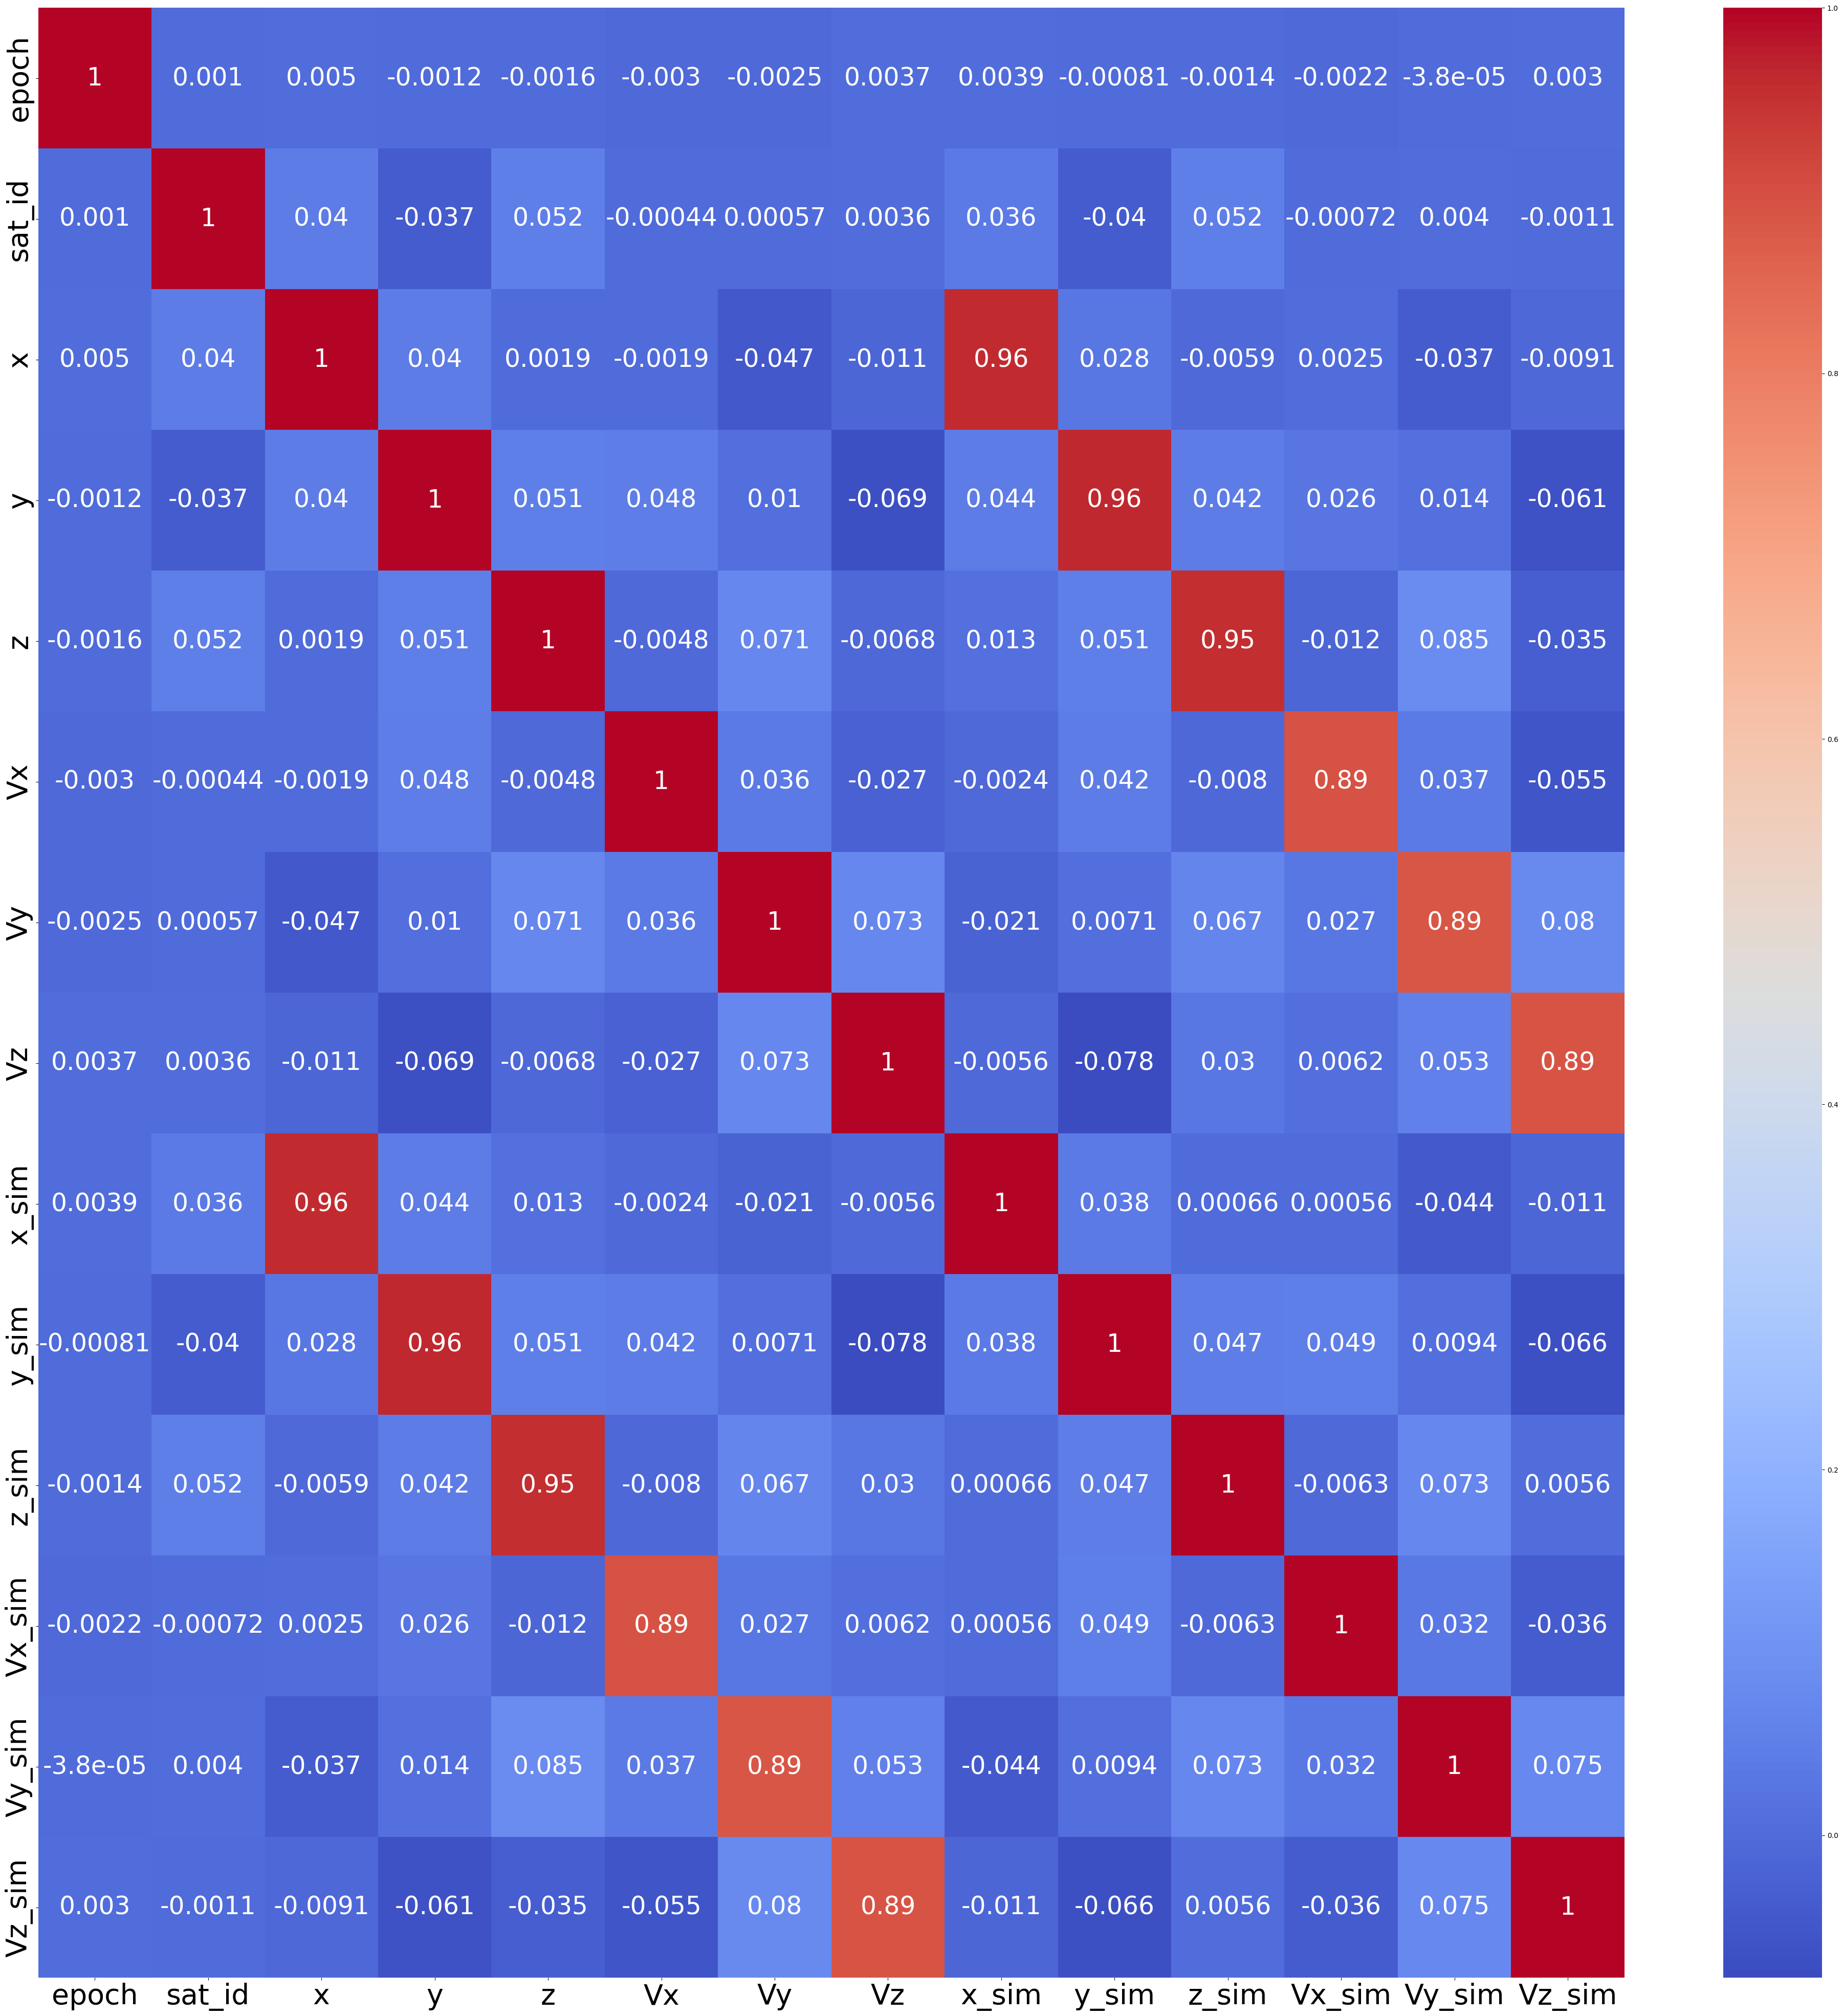

In [ ]:
plt.figure(figsize=(50,50))

sns.heatmap(df_witout.corr(),annot=True,annot_kws={"size": 35}, cmap='coolwarm')
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.show()

In [ ]:
df_witout.drop(["x_sim","y_sim","z_sim"],axis=1,inplace=True)

In [ ]:
df_witout.head()

epoch    sat_id         x         y         z        Vx        Vy  \
0 -0.642949 -1.819046 -0.473139  0.762699 -1.757443 -0.316704 -1.357954   
1 -0.640372 -1.819046 -0.572428  0.083678 -2.075061 -0.104171 -1.523832   
2 -0.642714 -1.819046 -0.573066 -0.613189 -2.056847  0.099349 -1.443393   
3 -0.642949 -1.819046 -0.490100 -1.231556 -1.756763  0.253092 -1.202621   
4 -0.642949 -1.819046 -0.349206 -1.720395 -1.263593  0.350254 -0.897429   

         Vz    Vx_sim    Vy_sim    Vz_sim  
0 -0.972548 -0.317509 -1.367124 -0.949122  
1 -0.289440 -0.104760 -1.533535 -0.282170  
2  0.358121  0.099096 -1.453700  0.350467  
3  0.842335  0.253263 -1.213299  0.824048  
4  1.144115  0.350841 -0.908109  1.119667

## split data TRAIN & TEST

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test = train_test_split(df_witout, test_size=0.2, random_state=42)


# model

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=600, random_state=42)

In [ ]:
kmeans.fit(df_witout)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=600, random_state=42)

In [ ]:
kmeans.labels_

array([410, 232,  39, ..., 374, 374, 151], dtype=int32)

In [ ]:
pred=pd.value_counts(kmeans.labels_)

<ipython-input-40-5a10655ea52f>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pred=pd.value_counts(kmeans.labels_)


In [ ]:
pred

427    1573
129    1521
29     1497
119    1493
229    1487
       ... 
551     181
474     181
571     178
496     173
503     162
Name: count, Length: 600, dtype: int64

In [ ]:
real=df['sat_id'].value_counts()

In [ ]:
real

sat_id
372    4894
186    4804
429    4702
321    4392
529    4386
       ... 
524      93
515      86
487      85
301      77
252      73
Name: count, Length: 600, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score,mean_squared_error

In [ ]:
accuracy_score(real,pred)

0.0

In [ ]:
mean_squared_error(real,pred)

399738.215

In [ ]:
from sklearn.metrics import silhouette_score
labels = kmeans.fit_predict(df_witout)
score = silhouette_score(df_witout, labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
print(score)

0.19636242636610313


In [ ]:
from sklearn.cluster import Birch
birch = Birch(n_clusters=600)
labels = birch.fit_predict(df_witout)

In [ ]:
score = silhouette_score(df_witout, labels)

In [ ]:
print(score)

0.11844464152157368
